In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import os
from sklearn.preprocessing import MinMaxScaler


In [16]:

def load_data(ticker):
    """Load data from CSV file."""
    file_path = os.path.join('financial_data', f"{ticker}_historical_data_2015_2025.csv")
    try:
        df = pd.read_csv(file_path)
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)
        return df
    except FileNotFoundError:
        print(f"Error: {file_path} not found.")
        return None
    except Exception as e:
        print(f"Error loading data for {ticker}: {str(e)}")
        return None


In [17]:

def clean_data(df, ticker):
    """Clean the DataFrame: check data types, handle missing values."""
    print(f"\nCleaning data for {ticker}...")
    print("Data types before cleaning:\n", df.dtypes)
    
    price_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close']
    for col in price_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    other_columns = ['Volume', 'Daily_Return', 'Volatility']
    for col in other_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    missing = df.isnull().sum()
    print("Missing values:\n", missing)
    
    df[price_columns] = df[price_columns].interpolate(method='linear')
    df[other_columns] = df[other_columns].fillna(method='ffill')
    
    print("Missing values after cleaning:\n", df.isnull().sum())
    print("Data types after cleaning:\n", df.dtypes)
    return df


In [18]:

def normalize_data(df, columns):
    """Normalize specified columns using MinMaxScaler."""
    scaler = MinMaxScaler()
    df[columns + '_scaled'] = scaler.fit_transform(df[[columns]])
    return df

def calculate_risk_metrics(df, ticker, risk_free_rate=0.02):
    """Calculate Value at Risk (VaR) and Sharpe Ratio."""
    daily_returns = df['Daily_Return']
    var_95 = np.percentile(daily_returns.dropna(), 5)
    print(f"{ticker} 95% VaR (daily): {var_95:.4f} (5% chance of losing more than {abs(var_95*100):.2f}% in a day)")
    
    mean_return = daily_returns.mean() * 252
    std_return = daily_returns.std() * np.sqrt(252)
    sharpe_ratio = (mean_return - risk_free_rate) / std_return
    print(f"{ticker} Sharpe Ratio (annualized): {sharpe_ratio:.4f}")

def adf_test(series, name):
    """Perform Augmented Dickey-Fuller test for stationarity."""
    result = adfuller(series.dropna())
    print(f"\nADF Test for {name}:")
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    print("Critical Values:", {k: f"{v:.4f}" for k, v in result[4].items()})
    if result[1] < 0.05:
        print(f"{name} is likely stationary (p-value < 0.05).")
    else:
        print(f"{name} is likely non-stationary (p-value >= 0.05). Differencing may be required.")

def detect_outliers(df, column, ticker):
    """Detect outliers using IQR method."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"\n{ticker} Outliers in {column} (IQR method): {len(outliers)} days")
    if not outliers.empty:
        print(outliers[[column]].head())



Processing TSLA...

Cleaning data for TSLA...
Data types before cleaning:
 Open             object
High             object
Low              object
Close            object
Adj Close        object
Volume           object
Daily_Return    float64
Volatility      float64
dtype: object
Missing values:
 Open            1
High            1
Low             1
Close           1
Adj Close       1
Volume          1
Daily_Return    1
Volatility      1
dtype: int64
Missing values after cleaning:
 Open            1
High            1
Low             1
Close           1
Adj Close       1
Volume          1
Daily_Return    1
Volatility      1
dtype: int64
Data types after cleaning:
 Open            float64
High            float64
Low             float64
Close           float64
Adj Close       float64
Volume          float64
Daily_Return    float64
Volatility      float64
dtype: object

Basic statistics for TSLA:
               Open         High          Low        Close    Adj Close  \
count  2514.000000

C:\Users\Daniel.Temesgen\AppData\Local\Temp\ipykernel_34452\1153036082.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[other_columns] = df[other_columns].fillna(method='ffill')


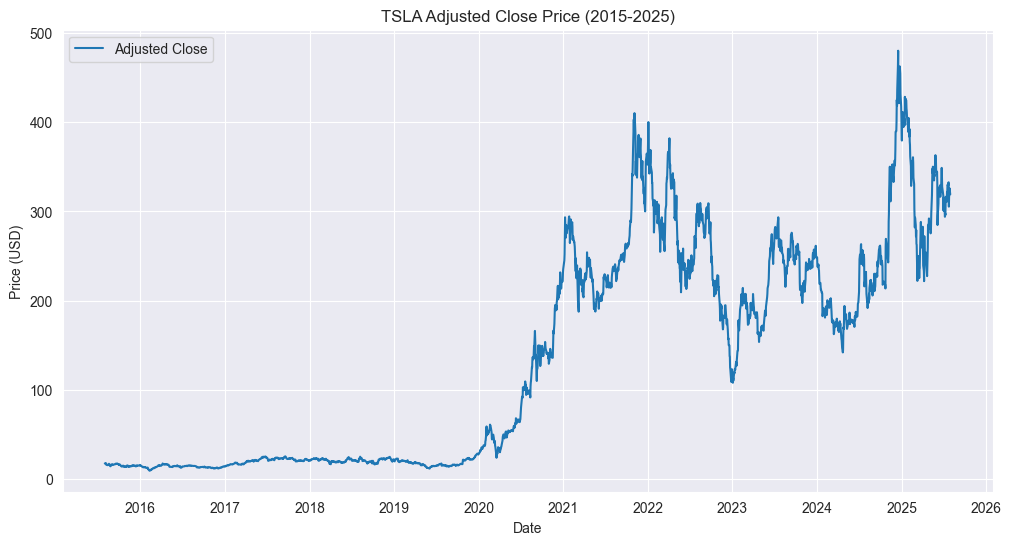

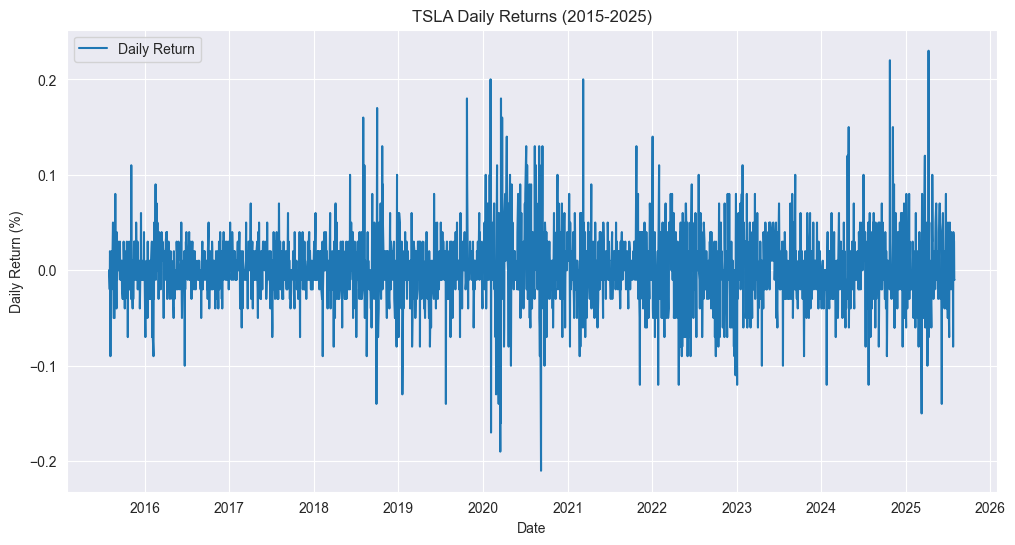

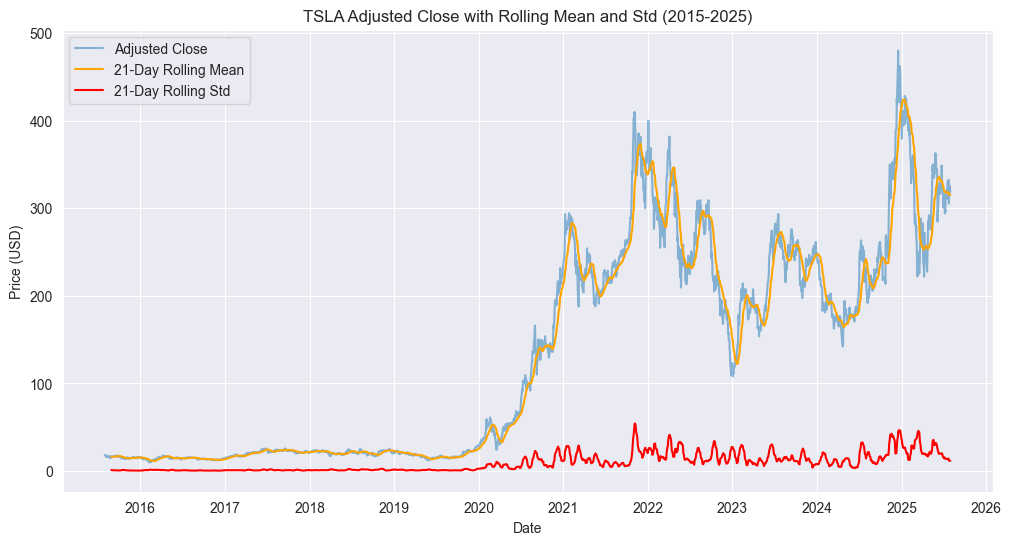

Cleaned data for TSLA saved.

Processing BND...

Cleaning data for BND...
Data types before cleaning:
 Open             object
High             object
Low              object
Close            object
Adj Close        object
Volume           object
Daily_Return    float64
Volatility      float64
dtype: object
Missing values:
 Open            1
High            1
Low             1
Close           1
Adj Close       1
Volume          1
Daily_Return    1
Volatility      1
dtype: int64
Missing values after cleaning:
 Open            1
High            1
Low             1
Close           1
Adj Close       1
Volume          1
Daily_Return    1
Volatility      1
dtype: int64
Data types after cleaning:
 Open            float64
High            float64
Low             float64
Close           float64
Adj Close       float64
Volume          float64
Daily_Return    float64
Volatility      float64
dtype: object

Basic statistics for BND:
               Open         High          Low        Close    Adj C

C:\Users\Daniel.Temesgen\AppData\Local\Temp\ipykernel_34452\1153036082.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[other_columns] = df[other_columns].fillna(method='ffill')



ADF Test for BND Daily Returns:
ADF Statistic: -9.5803
p-value: 0.0000
Critical Values: {'1%': '-3.4330', '5%': '-2.8627', '10%': '-2.5674'}
BND Daily Returns is likely stationary (p-value < 0.05).

BND Outliers in Daily_Return (IQR method): 242 days
            Daily_Return
Date                    
2015-09-17          0.01
2015-12-03         -0.01
2016-06-03          0.01
2016-06-24          0.01
2016-06-27          0.01
BND 95% VaR (daily): -0.0000 (5% chance of losing more than 0.00% in a day)
BND Sharpe Ratio (annualized): -0.4523


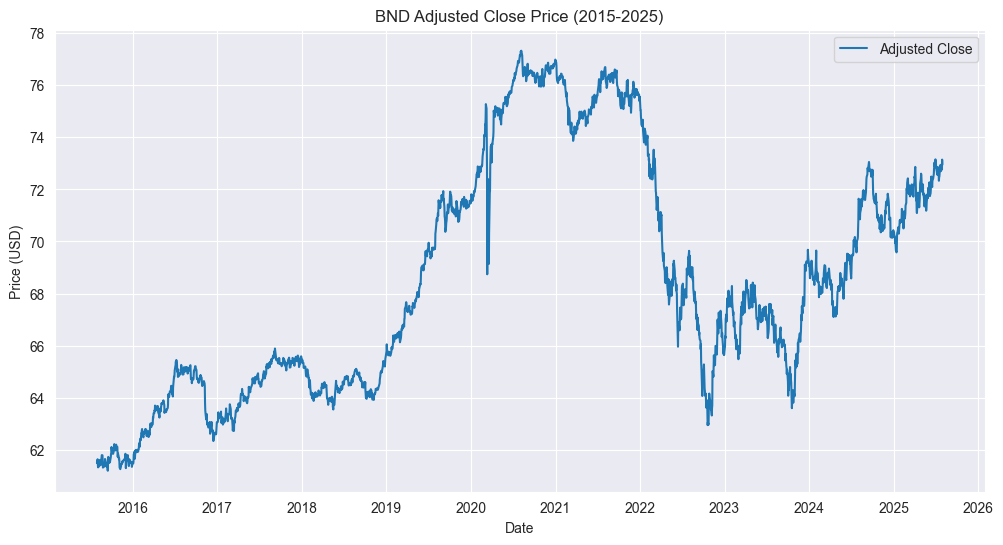

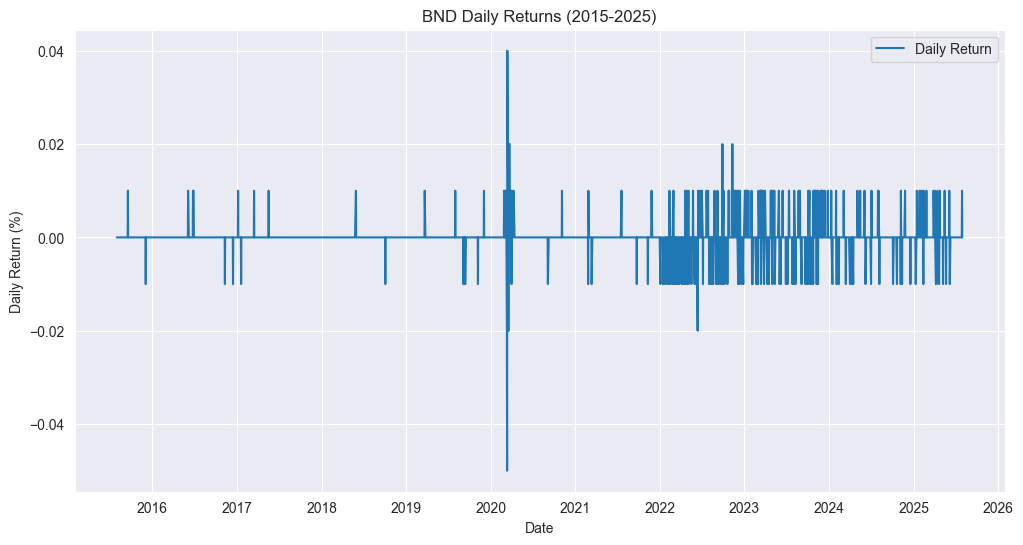

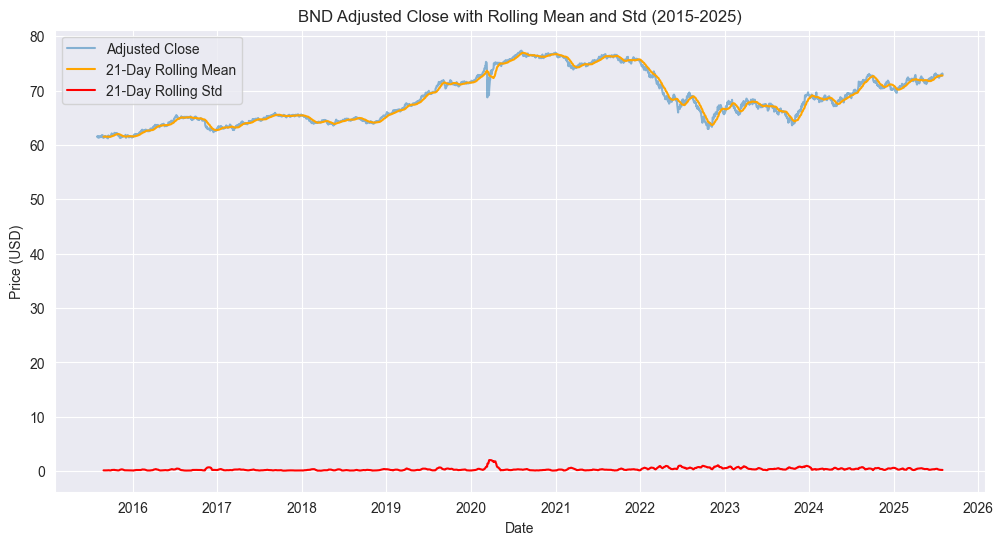

Cleaned data for BND saved.

Processing SPY...

Cleaning data for SPY...
Data types before cleaning:
 Open             object
High             object
Low              object
Close            object
Adj Close        object
Volume           object
Daily_Return    float64
Volatility      float64
dtype: object
Missing values:
 Open            1
High            1
Low             1
Close           1
Adj Close       1
Volume          1
Daily_Return    1
Volatility      1
dtype: int64
Missing values after cleaning:
 Open            1
High            1
Low             1
Close           1
Adj Close       1
Volume          1
Daily_Return    1
Volatility      1
dtype: int64
Data types after cleaning:
 Open            float64
High            float64
Low             float64
Close           float64
Adj Close       float64
Volume          float64
Daily_Return    float64
Volatility      float64
dtype: object

Basic statistics for SPY:
               Open         High          Low        Close    Adj Cl

C:\Users\Daniel.Temesgen\AppData\Local\Temp\ipykernel_34452\1153036082.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[other_columns] = df[other_columns].fillna(method='ffill')


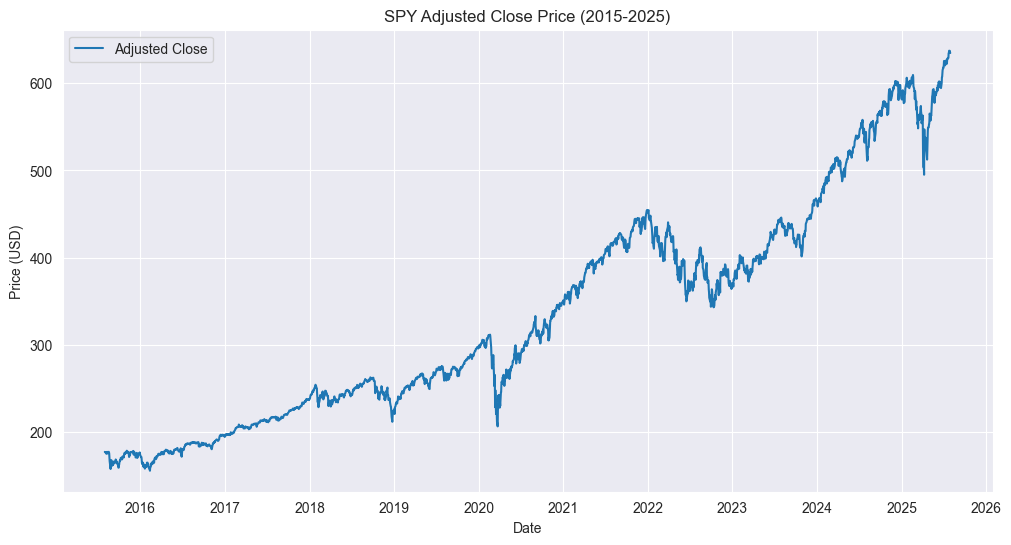

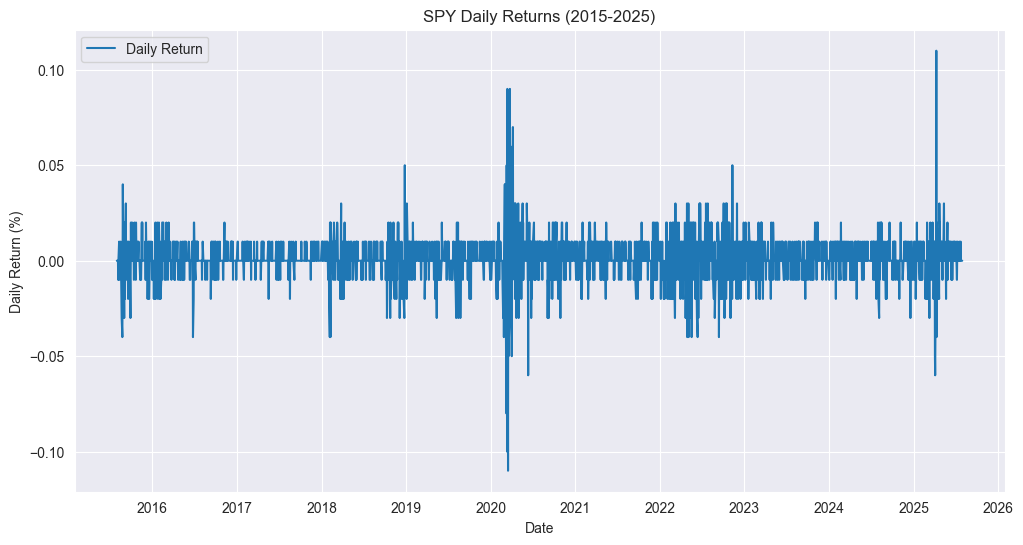

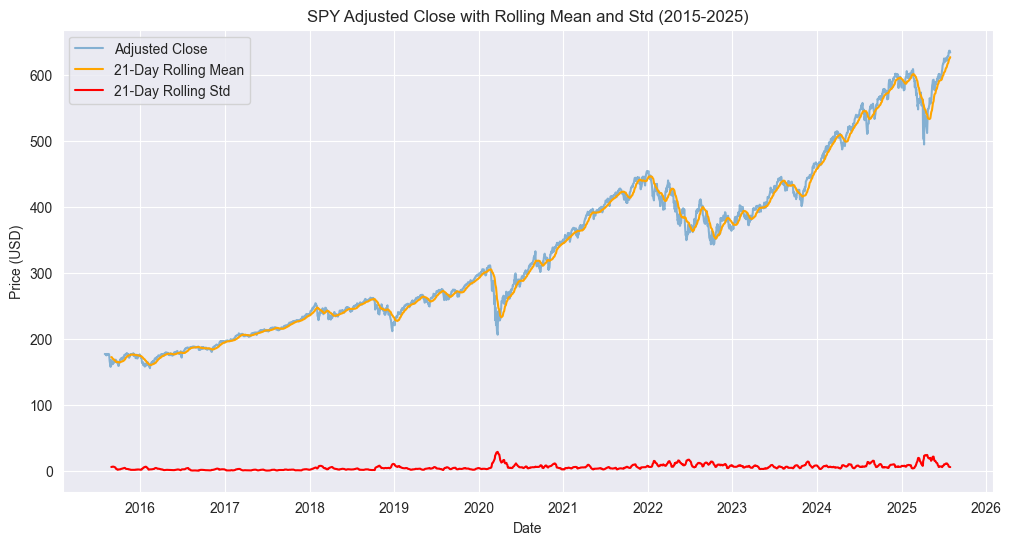

Cleaned data for SPY saved.


In [19]:

def plot_data(df, ticker, output_dir):
    """Create EDA plots: Closing Price, Daily Returns, Volatility."""
    sns.set_style('darkgrid')  # Use Seaborn's darkgrid style instead of Matplotlib's seaborn
    
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Adj Close'], label='Adjusted Close')
    plt.title(f"{ticker} Adjusted Close Price (2015-2025)")
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.legend()
    plt.savefig(os.path.join(output_dir, f"{ticker}_close_price.png"))
    plt.show()
    
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Daily_Return'], label='Daily Return')
    plt.title(f"{ticker} Daily Returns (2015-2025)")
    plt.xlabel("Date")
    plt.ylabel("Daily Return (%)")
    plt.legend()
    plt.savefig(os.path.join(output_dir, f"{ticker}_daily_returns.png"))
    plt.show()
    
    rolling_mean = df['Adj Close'].rolling(window=21).mean()
    rolling_std = df['Adj Close'].rolling(window=21).std()
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Adj Close'], label='Adjusted Close', alpha=0.5)
    plt.plot(df.index, rolling_mean, label='21-Day Rolling Mean', color='orange')
    plt.plot(df.index, rolling_std, label='21-Day Rolling Std', color='red')
    plt.title(f"{ticker} Adjusted Close with Rolling Mean and Std (2015-2025)")
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.legend()
    plt.savefig(os.path.join(output_dir, f"{ticker}_rolling_stats.png"))
    plt.show()

def main():
    tickers = ['TSLA', 'BND', 'SPY']
    output_dir = 'eda_plots'
    os.makedirs(output_dir, exist_ok=True)
    
    for ticker in tickers:
        print(f"\nProcessing {ticker}...")
        
        df = load_data(ticker)
        if df is None:
            continue
        
        df = clean_data(df, ticker)
        
        print(f"\nBasic statistics for {ticker}:\n", df.describe())
        
        df = normalize_data(df, 'Adj Close')
        
        adf_test(df['Adj Close'], f"{ticker} Adjusted Close")
        adf_test(df['Daily_Return'], f"{ticker} Daily Returns")
        
        detect_outliers(df, 'Daily_Return', ticker)
        
        calculate_risk_metrics(df, ticker)
        
        plot_data(df, ticker, output_dir)
        
        df.to_csv(os.path.join('financial_data', f"{ticker}_cleaned_data_2015_2025.csv"))
        print(f"Cleaned data for {ticker} saved.")

if __name__ == "__main__":
    main()